In [12]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
from datetime import datetime

In [13]:
# Twitter API Keys
import os
consumer_key = os.getenv("twitter_consumer_key")
consumer_secret = os.getenv("twitter_consumer_secret")
access_token = os.getenv("twitter_access_token_key")
access_token_secret = os.getenv("twitter_access_token_secret")

In [14]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [15]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [16]:
# Create array with news outlet twitter handles
    #newsOutlets = ["BBCWorld", "nytimes"]
newsOutlets = ["BBCWorld", "CBSNews","CNN", "FoxNews", "nytimes"]

In [17]:
# print a single tweet json for reference
test_tweet = api.user_timeline(newsOutlets[0])
#print(json.dumps(test_tweet[0], sort_keys=True, indent=4))

In [18]:
# Create array to hold sentiments
sentiment_array = []

In [19]:
# Loop through all media outlets
for outlet in newsOutlets:
    counter = 1   
    
    # For each outlet loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get user's tweets, specifying the page
        public_tweets = api.user_timeline(outlet, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            #Get info for each tweet 
                      
            # Get account handle and full user name
            tweet_target = tweet["user"]["screen_name"]
            tweet_name = tweet["user"]["name"]
            
            # Convert tweet date
            converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            
            # Get tweet text
            tweet_text = tweet["text"]
            
            # Run sentiment analysis
            results = analyzer.polarity_scores(tweet["text"])
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            comp = results["compound"]
            
            # Place data in a dictionary
            sentiment = {"TweetsAgo":counter,
                         "Target": tweet_target,
                         "User": tweet_name,
                         "Date": converted_time,
                         "Text": tweet_text,
                         "Compound": comp,
                         "Positive": pos,
                         "Neutral": neu,
                         "Negative": neg
                        }
            
            # Append dictionary to master sentiment array
            sentiment_array.append(sentiment)
           
            # **** For testing only print sample tweet info ****           
           # print(f"Tweet# {counter}: {outlet}")
           # print(f"      name: {tweet_name} |  time: {converted_time} | {tweet_text} ")
            
            # Increment counter
            counter +=1

In [20]:
# Verify there are 500 total tweets (100 from each)
len(sentiment_array)

500

In [21]:
# Create data frame
sentiments_df = pd.DataFrame(sentiment_array)

#Force column order
sentiments_df = sentiments_df[["TweetsAgo","Target","User","Date","Positive","Neutral","Negative","Compound","Text"]]
sentiments_df.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
0,1,BBCWorld,BBC News (World),2017-12-01 15:34:41+00:00,0.000,1.000,0.000,0.0000,RT @BBCSport: The 2018 Fifa #WorldCupDraw is m...
1,2,BBCWorld,BBC News (World),2017-12-01 15:23:33+00:00,0.138,0.781,0.082,0.3612,Flight attendant still working at 81: Bette Na...
2,3,BBCWorld,BBC News (World),2017-12-01 15:22:55+00:00,0.000,0.769,0.231,-0.3400,Cohoes fire: Amateur US blacksmith burns down ...
3,4,BBCWorld,BBC News (World),2017-12-01 15:22:55+00:00,0.535,0.465,0.000,0.3182,Far-right embrace https://t.co/vUnjzsx2Fm
4,5,BBCWorld,BBC News (World),2017-12-01 14:59:55+00:00,0.000,1.000,0.000,0.0000,UN appeals for record $22.5bn humanitarian aid...


In [22]:
# Sort data frame by target and tweets ago
sentiments_df = sentiments_df.sort_values(["Target","TweetsAgo"], ascending=[True, False])
    #sentiments_df.head()

In [23]:
# Save twitter data to CSV file
sentiments_df.to_csv("recentTweets.csv", encoding="utf-8", index=False)

In [24]:
# Create charting data frames for each type
BBC_df = sentiments_df[sentiments_df["Target"]=="BBCWorld"]
CBS_df = sentiments_df[sentiments_df["Target"]=="CBSNews"]
CNN_df = sentiments_df[sentiments_df["Target"]=="CNN"]
FOX_df = sentiments_df[sentiments_df["Target"]=="FoxNews"]
NYT_df = sentiments_df[sentiments_df["Target"]=="nytimes"]

In [25]:
#Plot each outlets scatter graph
plt.scatter(BBC_df["TweetsAgo"], BBC_df["Compound"], marker="o", facecolors="gold", edgecolors="black", label="BBCWorld", alpha=0.75)
plt.scatter(CBS_df["TweetsAgo"], CBS_df["Compound"], marker="o", facecolors="blue", edgecolors="black", label="CBSNews", alpha=0.75)
plt.scatter(CNN_df["TweetsAgo"], CNN_df["Compound"], marker="o", facecolors="green", edgecolors="black", label="CNN", alpha=0.75)
plt.scatter(FOX_df["TweetsAgo"], FOX_df["Compound"], marker="o", facecolors="red", edgecolors="black", label="FoxNews", alpha=0.75)
plt.scatter(NYT_df["TweetsAgo"], NYT_df["Compound"], marker="o", facecolors="lightblue", edgecolors="black", label="NYTimes", alpha=0.75)

In [26]:
# Add labels to the x and y axes
curDate = datetime.now().date()
plt.title(f"Sentiment Analysis of Media Tweets as of {curDate}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

In [27]:
# Set your x and y limits
plt.xlim(100, 0)
plt.ylim(-1, 1)

(-1, 1)

In [28]:
# Set a grid on plot and format legend
plt.grid()
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
lgnd= plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", scatterpoints=1, fontsize=10, title="Media Outlets")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]

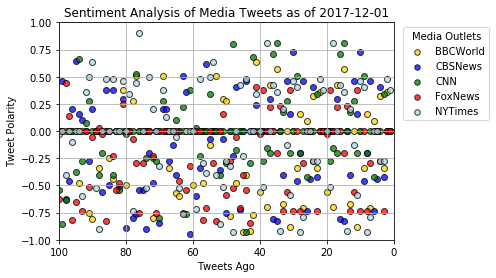

In [29]:
# Save and show plot
plt.savefig("SentimentScatterPlot.png")
plt.show()

In [30]:
# Group the data by media outlet
groupedNews = sentiments_df.groupby(["Target"], as_index=False)
    #groupedNews.head()

In [31]:
# Get the average Compound sentiment
avgComp = groupedNews["Compound"].mean()
avgComp.head()

,Target,Compound
0,BBCWorld,-0.124241
1,CBSNews,-0.115945
2,CNN,-0.018166
3,FoxNews,-0.213103
4,nytimes,-0.035460


In [32]:
# Set up arrays for charting
bar_outlets = avgComp["Target"]
bar_Compound = avgComp["Compound"]
x_axis = np.arange(0, len(bar_Compound), 1)

In [33]:
# Create a bar chart based upon the above data
plt.bar(x_axis, bar_Compound, color=["gold","blue","green","red","lightblue"], align="edge")

<Container object of 5 artists>

In [34]:
# Create the ticks for our bar chart's x axis
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, bar_outlets)

([<matplotlib.axis.XTick at 0x2707536f0b8>,
 <a list of 5 Text xticklabel objects>)

In [35]:
# Set the limits of the x axis
plt.xlim(-0.25, len(x_axis))

# Set the limits of the y axis
plt.ylim(-.3, .1)

(-0.3, 0.1)

In [36]:

# Give the chart a title, x label, and y label
plt.title(f"Overall Media Sentiment Based on Twitter as of {curDate}")
plt.xlabel("Outlets")
plt.ylabel("Tweet Polarity")

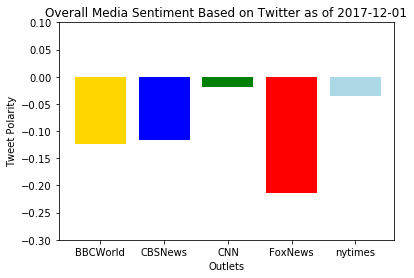

In [37]:
# Save an image of the chart and print it to the screen
plt.savefig("BarSentiment.png")
plt.show()